### Navigate to the location of folder ###

In [1]:
import os
os.chdir('../../src/Enviroments/ExternalEnv/RPNet')

In [2]:
os.getcwd()

'/home/welad1992/thesis/src/Enviroments/ExternalEnv/RPNet'

### Importing required modules

In [3]:
### Importing basic libraries
import scipy.io
import numpy as np
import torch
from scipy import signal
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import random
import pandas as pd
import scipy
import pickle
import sklearn
from sklearn.preprocessing import MinMaxScaler
import warnings
import math
import csv
from tqdm.notebook import tqdm

from scipy.signal import butter, lfilter, lfilter_zi
from pylab import plot, show, title, xlabel, ylabel, subplot

### Importing torch related libraries
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.functional as F
from torch.autograd import Variable   
import torch.optim as optim
from torch.optim import lr_scheduler
import datetime

### Importing Custom Libraries
from network import IncUNet
from utils import score,load_model_CNN,obtain_data

# Preprocessing #

### Navigate to the folder containing the model and data

In [4]:
data_path = "../../../../Data/mitdb/"
reference_path = "original_data/ref"
args = {}
args['datapath'] = data_path
args['dataset'] = 'mitdb'
args['evaluate_nstdb'] = False
args['db'] = 99

In [5]:
# count = 0 
# patient_reference = []
# for files in sorted(os.listdir(reference_path)):
#     count += 1
#     patient_reference.append(scipy.io.loadmat(os.path.join(reference_path,files)))
#     if count == 20:
#       break
# ### Entire thing can be run in a single line
# ### patient_reference = [scipy.io.loadmat(os.path.join(reference_path,files)) for files in tqdm(sorted(os.listdir(reference_path)))]

In [6]:
# print(len(patient_info))
# print(len(patient_reference))

### To obtain the patient's ECG Record + Normalize###

In [7]:

patient_ecg,windowed_beats = obtain_data(args)
dist_transform = np.array(windowed_beats)
# # BATCH_SIZE = 64
# # patient_ecg_t = torch.from_numpy(patient_ecg).float()
# # patient_ecg_t = patient_ecg_t.view((patient_ecg_t.shape[0],1,patient_ecg_t.shape[1]))
# # patient_ecg_tl = TensorDataset(patient_ecg_t)
# # trainloader = DataLoader(patient_ecg_tl, batch_size=BATCH_SIZE)
# # SAVED_MODEL_PATH = args.model_path 

  2%|▏         | 1/48 [00:00<00:05,  8.86it/s]

To del Indices are: [0, 7]
1
0
To del Indices are: [7]
0
To del Indices are: [9]
0
To del Indices are: [1, 9]
1
0
To del Indices are: [3]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [6, 10]
1
0
To del Indices are: []
To del Indices are: [2]
0
To del Indices are: [10, 12, 14]
2
1
0
To del Indices are: [5]
0
To del Indices are: [0, 2, 8]
2
1
0
To del Indices are: [6, 15]
1
0
To del Indices are: [0, 3, 14, 16]
3
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: [4]
0
To del Indices are: [12]
0
To del Indices are: [4, 11, 13]
2
1
0
To del Indices are: [2, 7]
1
0
To del Indices are: [7]
0
To del Indices are: [9, 12]
1
0
To del Indices are: [1]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [7, 9]
1
0
To del Indices are: [2, 4]
1
0
To del Indices are: []
To del Indices are: [7, 12]
1
0
To d

  8%|▊         | 4/48 [00:00<00:04,  9.52it/s]

[]
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [14]
0
To del Indices are: []
To del Indices are: [7]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [2]
0
To del Indices are: []
To del Indices are: [3]
0
To del Indices are: []
To del Indices are: [11]
0
To del Indices are: [12]
0
To del Indices are: [4, 7, 16]
2
1
0
To del Indices are: [7]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices a

 10%|█         | 5/48 [00:00<00:05,  8.57it/s]

5
4
3
2
1
0
To del Indices are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
To del Indices are: [0, 1, 2, 3, 4, 13, 14, 15]
7
6
5
4
3
2
1
0
To del Indices are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
To del Indices are: [0, 1, 2, 3, 6]
4
3
2
1
0
To del Indices are: []
To del Indices are: [3]
0
To del Indices are: [0]
0
To del Indices are: [1]
0
To del Indices are: [8, 13]
1
0
To del Indices are: [8]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [11]
0
To del Indices are: [1]
0
To del Indices are: []
To del Indices are: [5, 11]
1
0
To del Indices a

 15%|█▍        | 7/48 [00:00<00:04,  9.03it/s]

To del Indices are: [0, 1, 21]
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [6, 11, 15, 19]
3
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [3, 7, 10]
2
1
0
To del Indices are: [2, 5, 9, 12, 16]
4
3
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [14]
0
To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: [2, 7, 9, 19]
3
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [19]
0

 19%|█▉        | 9/48 [00:00<00:04,  9.40it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [14]
0
To del Indices are: [4, 7, 18]
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indice

 27%|██▋       | 13/48 [00:01<00:03, 10.61it/s]

To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del I

 31%|███▏      | 15/48 [00:01<00:03, 10.71it/s]

To del Indices are: [0, 1]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: [9]
0
To del Indices are: []
To del Indices are: []
To del Indices are: [3]
0
To del Indices are: []
To del Indices are: []
To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [8]
0
To del Indices are: [7, 9]
1
0
To del Indices are: [1, 7, 9, 13]
3
2
1
0
To del Indices are: []
To del Indices are: [4]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del 

 35%|███▌      | 17/48 [00:01<00:02, 10.54it/s]


To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [2, 6]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To

 40%|███▉      | 19/48 [00:01<00:02, 10.59it/s]

[]
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [10]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [2, 10]
1
0
To del Indices are: [7, 14]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del In

 44%|████▍     | 21/48 [00:01<00:02, 10.92it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [3]
0
To del Indices are: []
To del Indices are: []
To del Indices are: [2]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To

 52%|█████▏    | 25/48 [00:02<00:02, 10.84it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [18]
0
To del Indices are: [4]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [11, 17]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [16]
0
To del Indices are: [2]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del 

 56%|█████▋    | 27/48 [00:02<00:02, 10.28it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [17]
0
To del Indices are: [0, 14, 16]
2
1
0
To del Indices are: [7, 11, 19]
2
1
0
To del Indices are: [9]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices ar

 60%|██████    | 29/48 [00:02<00:01,  9.93it/s]

[]
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [8]
0
To del Indices are: [6, 14]
1
0
To del Indices are: [2, 4, 7, 13]
3
2
1
0
To del Indices are: [15]
0
To del Indices are: [9]
0
To del Indices are: [3, 11, 17]
2
1
0
To del Indices are: [3]
0
To del Indices are: []
To del Indices are: [9, 12]
1
0
To del Indices are: [3]
0
To del Indices are: [2, 9]
1
0
To del Indices are: [2]
0
To del Indices are: [10]
0
To del Indices are: []
To del Indices are: [7]
0
To del Indices are: [7]
0
To del Indices are: [2, 9]
1
0
To del Indices are: [3, 13]
1
0
To del Indices are: [1, 11, 14]
2
1
0
To del Indices are: [14]
0
To del Indices are: [10, 13]
1
0
To del Indices are: [7]
0
To del Indices are: [1, 7]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [4]
0
To del Indices are: [11]
0
To del Indices are: [13]
0
To del Indices are: [4]
0
To del Indices are: [6, 9, 10, 15, 17]
4
3
2
1
0
To del

 65%|██████▍   | 31/48 [00:02<00:01, 10.11it/s]

To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indi

 69%|██████▉   | 33/48 [00:03<00:01, 10.29it/s]

[7]
0
To del Indices are: [3]
0
To del Indices are: [6]
0
To del Indices are: []
To del Indices are: [8]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [4]
0
To del Indices are: []
To del Indices are: []
To del Indices are: [9]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [10]
0
To del Indices are: [3]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del

 73%|███████▎  | 35/48 [00:03<00:01,  9.90it/s]


To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [3, 7, 14]
2
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [2, 8]
1
0
To del Indices are: [14]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [7, 11]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [6]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are

 77%|███████▋  | 37/48 [00:03<00:01,  9.89it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del I

 81%|████████▏ | 39/48 [00:03<00:00, 10.38it/s]

To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indi

 85%|████████▌ | 41/48 [00:03<00:00, 10.35it/s]

To del Indices are: [10]
0
To del Indices are: [2]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
T

 90%|████████▉ | 43/48 [00:04<00:00, 10.49it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [5, 11, 13]
2
1
0
To del Indices are: [0, 3, 7, 11, 16, 1

 94%|█████████▍| 45/48 [00:04<00:00, 10.10it/s]

To del Indices are: [0]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [1, 11]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [14]
0
To del Indices are: []
To del Indices are: [1]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [17]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [9]
0
To del Indices are: []
To del Indices are: []
To del I

100%|██████████| 48/48 [00:04<00:00, 10.23it/s]

[]
To del Indices are: [8]
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: [4, 13]
1
0
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are: []
To del Indices are:


/home/welad1992/anaconda3/envs/tensorflow2.2/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


### To obtain the Reference Value ###

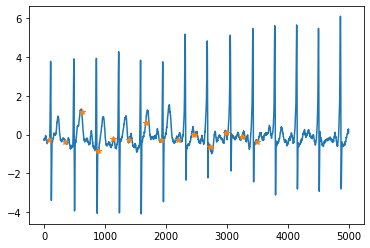

In [8]:
plt.plot(patient_ecg[0])
plt.plot(windowed_beats[0],patient_ecg[0][windowed_beats[0]],'*')

In [9]:
patient_ref = windowed_beats
# for j in range(0,len(windowed_beats)):
#     if(patient_reference[j]['R_peak'].shape[0] == 1):
#         patient_ref.append(patient_reference[j]['R_peak'][0].ravel().astype(np.float16))
#     else:
#         patient_ref.append(patient_reference[j]['R_peak'].ravel().astype(np.float16))

### Determining no of QRS complexes in windows

In [10]:
# count = np.zeros((5,1))
# for i in range(len(patient_ref)-64):
#     if(len(patient_ref[i]) <= 10):
#         count[0] += 1 
#     elif (len(patient_ref[i]) > 10 and len(patient_ref[i]) <= 20):
#         count[1] += 1
#     elif (len(patient_ref[i]) > 20 and len(patient_ref[i]) <= 30):
#         count[2] += 1
#     elif (len(patient_ref[i])>30 and len(patient_ref[i])<=40):
#         count[3] += 1
#     elif (len(patient_ref[i])>40 and len(patient_ref[i])<=50):
#         count[4] += 1

### Distance Transform- Obtaining ground truth

In [12]:
# distance_transform = []

# for i in range(len(patient_ref)):
#     if len(patient_ref[i])<2:        
#         patient_ecg = np.delete(patient_ecg,i,0)
#         continue
#     prev_qrs = patient_ref[i][0]
#     next_qrs = patient_ref[i][1]
#     dist_tran = np.zeros(patient_ecg.shape[1])
#     beat_count = 1
#     for j in range(len(dist_tran)):
#         threshold = (prev_qrs + next_qrs)/2   
#         if(j < threshold):
#             dist_tran[j] = int(abs(j - prev_qrs))/250
#         elif(j >= threshold): 
#             dist_tran[j] = int(abs(j - next_qrs))/250
#         if(j == next_qrs and beat_count != len(patient_ref[i])-1): ## -2 instead of -1 because we are incrementing the beat in the loop
#             beat_count += 1 
#             prev_qrs = next_qrs
#             next_qrs = patient_ref[i][beat_count]
#     distance_transform.append(dist_tran)
# distance_transform = np.asarray(distance_transform)
# scaler = MinMaxScaler(feature_range = (0,1))
# distance_transform =  np.transpose(scaler.fit_transform(distance_transform.transpose())) 

In [13]:
# dist_transform = torch.Tensor(distance_transform)
# dist_transform = dist_transform.view(dist_transform.shape[0],1,dist_transform.shape[1])
# print(dist_transform.shape)

In [14]:
# patient_ecg.shape

In [15]:
# BATCH_SIZE=64
# patient_ecg_t = torch.from_numpy(patient_ecg).float()
# patient_ecg_train = patient_ecg_t[:1936,:]
# patient_ecg_train = patient_ecg_train.view((patient_ecg_train.shape[0],1,patient_ecg_train.shape[1]))
# dist_transform_train = dist_transform[:1936,0,:]
# dist_transform_train = dist_transform_train.view(dist_transform_train.shape[0],1,dist_transform_train.shape[1])
# print("Shape of input:",patient_ecg_train.shape)
# print("Shape of ground truth:",dist_transform_train.shape)
# patient_ecg_tl = TensorDataset(patient_ecg_train,dist_transform_train)
# trainloader = DataLoader(patient_ecg_tl, batch_size=BATCH_SIZE, shuffle = True)

# patient_ecg_t_test = patient_ecg_t[1936:,:]
# patient_ecg_t_test = patient_ecg_t_test.view((patient_ecg_t_test.shape[0],1,patient_ecg_t_test.shape[1]))
# dist_transform_test = dist_transform[1936:,:]
# print("Shape of input:",patient_ecg_t_test.shape)
# print("Shape of ground truth:",dist_transform_test.shape)
# patient_ecg_tl_test = TensorDataset(patient_ecg_t_test,dist_transform_test)
# testloader = DataLoader(patient_ecg_tl_test, batch_size=BATCH_SIZE)

# torch.save(patient_ecg_train, 'train.pt')
# torch.save(patient_ecg_t_test, 'test.pt')
# torch.save(dist_transform_train, 'dist_transform_train.pt')
# torch.save(dist_transform_test, 'dist_transform_test.pt')

In [16]:
# plt.plot(patient_ecg_train[1][0])
# plt.plot(dist_transform_train[1][0])

# Train and Evaluate #

### Hyperparameters and Related parameters

In [17]:
BATCH_SIZE = 64
C,H,W = 1,1,5000
learn_rate = 0.05
num_epochs = 480

### Loading data via the pt files

In [18]:
patient_ecg_train = torch.load('train.pt')
dist_transform_train = torch.load('dist_transform_train.pt')
patient_ecg_test = torch.load('test.pt')
dist_transform_test = torch.load('dist_transform_test.pt')

patient_ecg_train_td = TensorDataset(patient_ecg_train, dist_transform_train)
trainloader = DataLoader(patient_ecg_train_td, batch_size=BATCH_SIZE, shuffle = True)

patient_ecg_test_td = TensorDataset(patient_ecg_test, dist_transform_test)
testloader = DataLoader(patient_ecg_test_td, batch_size=BATCH_SIZE)

### Visualizing using Matplotlib

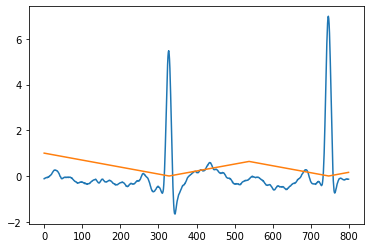

In [19]:
record_no = 18
plt.plot(patient_ecg_train[record_no,0,:].numpy()[:800])
plt.plot(dist_transform_train[record_no,0,:].numpy()[:800])

### Ensuring deterministicity through Random seeding


In [20]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
manualSeed = 4
random.seed(manualSeed)
torch.manual_seed(manualSeed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(manualSeed) 

### Setting the optimizer and Loss function

In [21]:
model = IncUNet(in_shape = (C,H,W))
model.cuda()

optimizer = optim.Adam(model.parameters(), lr = learn_rate)# Try out weight decay , 
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[90,190,450], gamma=0.1)

criterion = nn.SmoothL1Loss()

### Initializing Tensorboard ###

In [22]:
### Using datetime to capture date time and write details into a text file
date_time = str(datetime.datetime.now())
date = date_time[:10]
start_time = date_time[11:19]
model_path = "saved_model/" + date + "__" + start_time + "/" 
if not(os.path.exists('saved_model')): 
    os.mkdir('saved_model')
os.mkdir(model_path)
log_file = './' + model_path + 'logfile.txt'
log_data = open(log_file,'w+')
settings = ' The Settings of the model are: Epoch:%d, LR:%f, BATCH_SIZE:%d Seed:%d\n'%(num_epochs,learn_rate,BATCH_SIZE,manualSeed)
log_data.write(settings) 

77

### Training ###

In [23]:
# epoch_loss = []
# min_test_loss = 1000 ### Set a very high number

# for epoch in range(num_epochs):
#     print ('-'*40)
#     model.train()
#     print ('Epoch {}/{}'.format(epoch+1,num_epochs))
#     print ('-'*10)
#     net_loss = 0
    
#     for step,(x,y) in enumerate(trainloader):
        
#         if step %10 ==0:
#             print("Step no: {}/{}".format(step+1, len(trainloader)))
#         x,y = x.cuda(),y.cuda()
#         y_predict = model(x) 
        
#         ### Loss computation and Optimization ###
#         loss = criterion(y,y_predict)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         net_loss += loss
        
#     net_loss = net_loss/ (step + 1)
    
#     ### Logging ###
#     settings = "\nEpoch:{},Loss:{}".format(epoch,net_loss)
#     log_data.write(settings)
#     if(epoch == num_epochs - 1):
#         log_data.close()
    
#     print("Net loss is:", net_loss)
#     epoch_loss.append(net_loss.data)
    
#     scheduler.step()

#     ### Evaluation and saving best model ###    
#     if epoch % 10 == 0:
#         print ('-'*40)
#         print("..........Evaluation..........")
#         print("Epoch No is:", epoch)
#         model.eval()
    
#         with torch.no_grad():
#           net_test_loss = 0 
#           for step,(x,y) in enumerate(testloader): ### Use trainloader for AK2-11 ###
#               x,y = Variable(x.cuda()),Variable(y.cuda())
#               y_predict_test = model(x)
                           
#               test_loss = criterion(y_predict_test,y)                
#               net_test_loss += test_loss                 
            
#           net_test_loss /= step + 1 
            
#         ### Saving the best model based on the Minimum Loss
#         if net_test_loss < min_test_loss:
#           min_test_loss = net_test_loss
#           print("..........Saving the model..........")
#           torch.save(model.state_dict(),model_path+'Epoch'+str(epoch)+'.pt')

### Evaluation



In [24]:
best_model_path = 'saved_model/2021-01-30__11:53:34/Epoch160.pt'

SAVED_MODEL_PATH = "model_1.pt"
# model.load_state_dict(torch.load(SAVED_MODEL_PATH))
model.load_state_dict(torch.load(best_model_path))


<All keys matched successfully>

In [30]:
model.eval()
y_pred_array = []
ecg = []

with torch.no_grad():
  net_test_loss = 0 
  for step,(x,y) in enumerate(testloader): 
      
      x,y = x.cuda(),y.cuda()
      y_predict_test = model(x)
                   
      test_loss = criterion(y_predict_test,y)                
      net_test_loss += test_loss   
      print('Step: {}, Loss: {} '.format(step,net_test_loss))

      ecg.append(x.cpu().numpy())
      y_pred_array.append(y_predict_test[:,0,:].cpu().numpy())

Step: 0, Loss: 0.002721172757446766 


### Post Processing ###

In [26]:
batch_no = 0
y_pred_array = np.asarray(y_pred_array[batch_no])
ecg = np.asarray(ecg[batch_no])[:,0,:]

peak_locs = []
for i in range(y_pred_array.shape[0]):
    peak_locs.append(scipy.signal.find_peaks(-y_pred_array[i,:],distance = 90,height = -0.2,prominence = 0.035)[0])

### Getting the amplitude values at valley location. 
y_roll_valleys = []
y = []
for j in range(len(peak_locs)):
    y = [ecg[j,i] for i in peak_locs[j]]
    y_roll_valleys.append(y)

### Plotting output ###

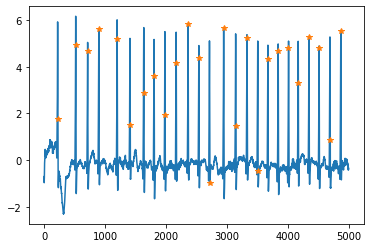

In [49]:
record_no = 12
plt.plot(ecg[0][record_no][0])
plt.plot(peak_locs[record_no], y_roll_valleys[record_no],'*')
# plt.plot(y_pred_array[13])

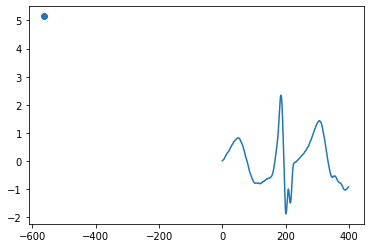

In [28]:
record_no = 63
plt.plot(ecg[record_no,:][2300:2700])
plt.scatter(peak_locs[record_no][4:5]-2300, y_roll_valleys[record_no][4:5])

In [45]:
ecg[0][13][0]

array([-0.35868537, -0.5022971 , -0.49352783, ..., -0.19950116,
       -0.25065196, -0.39119738], dtype=float32)

In [37]:
from torchsummary import summary


summary(model, (1, 5000,))
print('Done')

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 2500]            --
|    └─Conv1d: 2-1                       [-1, 64, 2500]            320
|    └─BatchNorm1d: 2-2                  [-1, 64, 2500]            128
|    └─LeakyReLU: 2-3                    [-1, 64, 2500]            --
|    └─IncResBlock: 2-4                  [-1, 64, 2500]            --
|    |    └─Conv1d: 3-1                  [-1, 64, 2500]            4,096
|    |    └─Sequential: 3-2              [-1, 16, 2500]            15,408
|    |    └─Sequential: 3-3              [-1, 16, 2500]            5,456
|    |    └─Sequential: 3-4              [-1, 16, 2500]            5,968
|    |    └─Sequential: 3-5              [-1, 16, 2500]            6,480
|    |    └─ReLU: 3-6                    [-1, 64, 2500]            --
├─Sequential: 1-2                        [-1, 128, 1250]           --
|    └─LeakyReLU: 2-5                    [-1, 64, 2500]            